<a href="https://colab.research.google.com/github/nistaku/TMDL/blob/main/TMDL_2024_25_Assignment_4%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning

## Assignment Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


In [ ]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated

# CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s + 1}$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s+1 }$$

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

## Convolution Steps to Downsample from 28×28 to 6×6

---

### Step 1

Apply a convolution with:

- Kernel size: $k = 3$  
- Stride: $s = 2$  
- Padding: $p = 1$

$$
o = \frac{28 - 3 + 2 \cdot 1}{2} + 1  
= \frac{26}{2} + 1  
= 13 + 1 = 14
$$

**Output size: $14 \times 14$**

---

### Step 2

Apply another convolution with:

- Kernel size: $k = 3$  
- Stride: $s = 2$  
- Padding: $p = 1$

$$
o = \frac{14 - 3 + 2 \cdot 1}{2} + 1  
= \frac{12}{2} + 1  
= 6 + 1 = 7
$$

**Output size: $7 \times 7$**

---

### Step 3

Apply a final convolution with:

- Kernel size: $k = 2$  
- Stride: $s = 1$  
- Padding: $p = 0$

$$
o = \frac{7 - 2 + 0}{1} + 1  
= \frac{5}{1} + 1  
= 5 + 1 = 6
$$

**Output size: $6 \times 6$**

---

### Final Summary Table

| Layer   | Kernel ($k$) | Stride ($s$) | Padding ($p$) | Output Size         |
|---------|--------------|---------------|----------------|---------------------|
| Conv 1  | 3            | 2             | 1              | $28 \rightarrow 14$ |
| Conv 2  | 3            | 2             | 1              | $14 \rightarrow 7$  |
| Conv 3  | 2            | 1             | 0              | $7 \rightarrow 6$   |

**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the model
model = keras.Sequential([
    # Step 1: First Conv2D layer (28x28 -> 14x14)
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same', strides=2),

    # Step 2: Second Conv2D layer (14x14 -> 7x7)
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', strides=2),

    # Step 3: Third Conv2D layer (7x7 -> 6x6)
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='valid', strides=1),

    # Flatten the 6x6x64 output to pass it to the Dense layer
    layers.Flatten(),

    # Fully connected layer for classification
    layers.Dense(128, activation='relu'),

    # Final output layer with 10 classes (MNIST digits: 0-9)
    layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare the dataset (MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images to [0, 1]
x_train = x_train[..., np.newaxis]  # Add channel dimension (1 for grayscale)
x_test = x_test[..., np.newaxis]  # Add channel dimension (1 for grayscale)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.8686 - loss: 0.4504 - val_accuracy: 0.9771 - val_loss: 0.0785
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.9808 - val_loss: 0.0645
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9914 - loss: 0.0262 - val_accuracy: 0.9853 - val_loss: 0.0495
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9868 - val_loss: 0.0492
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9846 - loss: 0.0492
Test accuracy: 0.988099992275238


**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

**Your text answer**

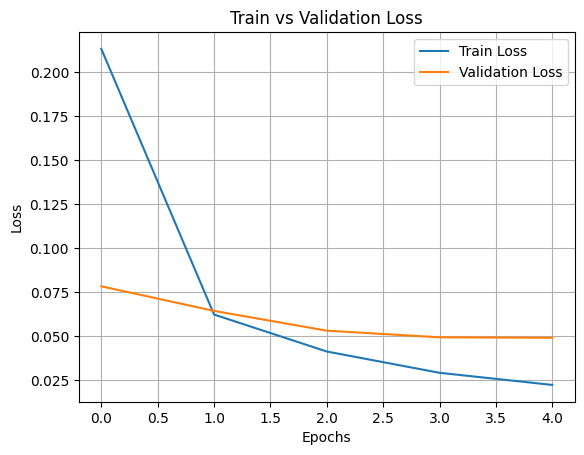

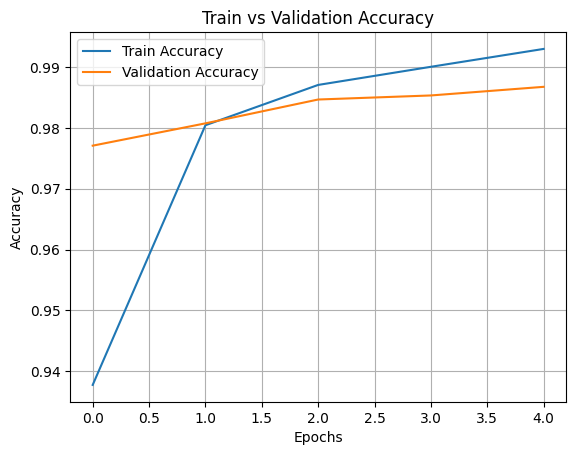

In [ ]:
import matplotlib.pyplot as plt

# Plot losses
plt.plot(history.history["loss"], label="Train Loss")  # training loss
plt.plot(history.history["val_loss"], label="Validation Loss")  # validation loss
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.title("Train vs Validation Loss")
plt.show()

# Plot accuracies
plt.plot(history.history["accuracy"], label="Train Accuracy")  # training accuracy
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")  # validation accuracy
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.title("Train vs Validation Accuracy")
plt.show()

# RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('/content/drive/MyDrive/Course/Bechelor1/Block4/TMDL/AirPassengers.csv')
time_series = data['#Passengers'].values.astype(float)

time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# predict the (n+1)th point given n points
sequence_length = 6

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the LSTM model
model = keras.Sequential([
    layers.LSTM(50, input_shape=(sequence_length, 1), return_sequences=False),  # LSTM layer
    layers.Dense(1)  # Output layer (regression)
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - loss: 0.0643 - val_loss: 0.2616
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0575 - val_loss: 0.1981
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0390 - val_loss: 0.1440
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0268 - val_loss: 0.0988
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0162 - val_loss: 0.0631
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0092 - val_loss: 0.0391
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0086 - val_loss: 0.0270
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0109 - val_loss: 0.0227
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0118 - val_loss: 0.0226
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0106 - val_loss: 0.0252
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0088 - val_loss: 0.0294
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0072 - val_loss: 0.0346


**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

**Overfitting and Underfitting Analysis**

Based on the plots of training and validation loss, as well as the RMSE (Root Mean Squared Error), we can make the following observations:

**Training Loss vs Validation Loss:**

As the training loss decreases consistently while the validation loss starts to increase, it indicates overfitting. This means that the model is learning to perform very well on the training data but is failing to generalize to unseen data (validation data).

**Root Mean Squared Error (RMSE):**

The RMSE gives us an idea of how well the model is predicting values. A lower RMSE indicates that the model's predictions are closer to the actual values.

As the training RMSE is significantly lower than the test RMSE, it might suggest overfitting. In this case, the model is fitting the training data well but not generalizing well to the test set.

**Would You Continue Training or Stop Early?**

As the training loss continues to improve and the validation loss starts to plateau or increase, you may consider stopping training earlier to prevent overfitting. You could use early stopping techniques, where training is stopped once the validation loss no longer improves.

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


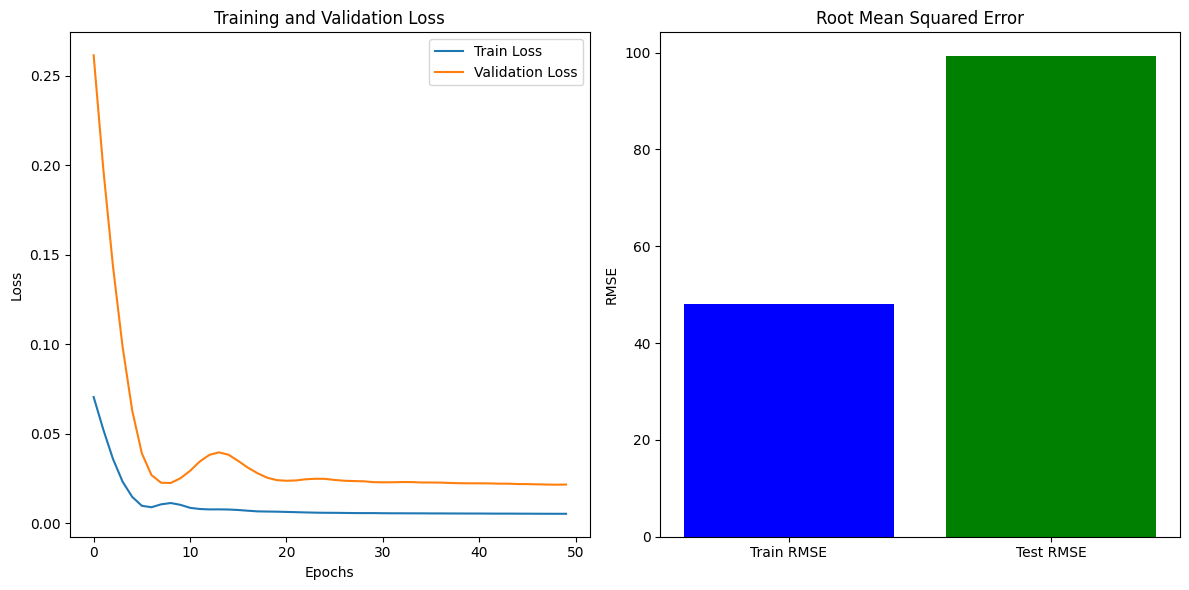

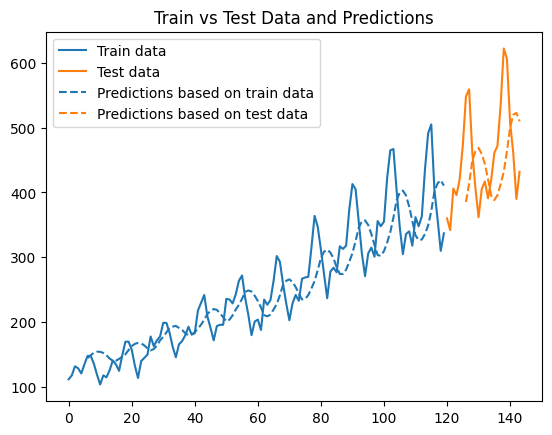

Train Score: 2319.73 (MSE)
Test Score: 9841.85 (MSE)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert predictions and actual values to get the original scale (denormalize)
train_preds = scaler.inverse_transform(train_preds)
y_train_actual = scaler.inverse_transform(y_train)
test_preds = scaler.inverse_transform(test_preds)
y_test_actual = scaler.inverse_transform(y_test)

# Plotting the train and validation losses over epochs
plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracies (though in regression, accuracy is not typically plotted)
# We will plot RMSE for both training and testing instead as a regression task.
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_preds))

plt.subplot(1, 2, 2)
plt.bar(['Train RMSE', 'Test RMSE'], [train_rmse, test_rmse], color=['blue', 'green'])
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error')

plt.tight_layout()
plt.show()

# Plot baseline and predictions
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds) + sequence_length:len(data), :] = scaler.inverse_transform(test_data)

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds) + 2 * sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:, 0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:, 0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:, 0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.title('Train vs Test Data and Predictions')
plt.show()

# Calculate RMSE for both train and test data
train_score = mean_squared_error(y_train_actual, train_preds)
print(f'Train Score: {train_score:.2f} (MSE)')

test_score = mean_squared_error(y_test_actual, test_preds)
print(f'Test Score: {test_score:.2f} (MSE)')